# Real Estate Dataset Analysis

In [15]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Optional, Sequence
from typing import Iterable, Optional

In [16]:
!pwd

/Users/rakshanda/Documents/Projects/snaphomz-trial-Rakshanda/notebooks


In [17]:
# Read the data
# Data 
org_data = pd.read_csv("../data/listings_sample.csv")
org_data.head()


,id,address,city,state,price,beds,baths,sqft,remarks,agent_id,list_date,media_urls
0,MLS-TX-1000,"960 Cedar Ct, Frisco, TX",Frisco,TX,803788,3,3,3892,"quiet cul-de-sac, two-car garage, near good sc...",AG7396,2025-07-14,"[""https://picsum.photos/seed/0/1200/800""]"
1,MLS-CA-1001,"2658 Elm Dr, Santa Clara, CA",Santa Clara,CA,1908765,3,2,3547,"fresh paint, new roof 2022, large backyard, HO...",AG3612,2024-12-05,"[""https://picsum.photos/seed/1/1200/800""]"
2,MLS-CA-1002,"7199 Birch Way, Mountain View, CA",Mountain View,CA,507705,4,3,1575,"updated kitchen, stainless appliances, fresh p...",AG1995,2024-09-26,"[""https://picsum.photos/seed/2/1200/800""]"
3,MLS-TX-1003,"7729 Walnut Blvd, Frisco, TX",Frisco,TX,1016982,4,1,3143,"granite counters, new roof 2022, tile flooring...",AG6892,2025-05-04,"[""https://picsum.photos/seed/3/1200/800""]"
4,MLS-TX-1004,"6284 Oak Ave, Frisco, TX",Frisco,TX,682810,4,1,2663,"two-car garage, hardwood floors, vaulted ceili...",AG6977,2025-07-07,"[""https://picsum.photos/seed/4/1200/800""]"


In [18]:
column_names = org_data.columns.tolist()
print(column_names)

['id', 'address', 'city', 'state', 'price', 'beds', 'baths', 'sqft', 'remarks', 'agent_id', 'list_date', 'media_urls']


In [19]:
org_data.info()
org_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          160 non-null    object
 1   address     160 non-null    object
 2   city        160 non-null    object
 3   state       160 non-null    object
 4   price       160 non-null    int64 
 5   beds        160 non-null    int64 
 6   baths       160 non-null    int64 
 7   sqft        160 non-null    int64 
 8   remarks     160 non-null    object
 9   agent_id    160 non-null    object
 10  list_date   160 non-null    object
 11  media_urls  160 non-null    object
dtypes: int64(4), object(8)
memory usage: 15.1+ KB


,price,beds,baths,sqft
count,1.600000e+02,160.000000,160.000000,160.000000
mean,1.101729e+06,3.456250,2.156250,2380.987500
std,7.879282e+05,0.983172,0.687232,985.057563
min,1.751420e+05,2.000000,1.000000,809.000000
25%,5.085175e+05,3.000000,2.000000,1479.750000
50%,8.630205e+05,3.000000,2.000000,2399.000000
75%,1.454584e+06,4.000000,3.000000,3158.250000
max,3.528809e+06,5.000000,3.000000,4187.000000


## Data Cleanup

In [20]:


df = org_data.copy()

cols = df.select_dtypes(include='number').columns.tolist()
add_indicator = True

for c in cols:
    # record where values are missing BEFORE imputation
    missing_mask = df[c].isna()
    if add_indicator:
        df[f"{c}_missing"] = missing_mask

    # compute median skipping NaNs
    median = df[c].median(skipna=True)

    # If median is NaN (e.g. all values missing), skip imputation to avoid filling with NaN
    if pd.notna(median):
        df[c] = df[c].fillna(median)

df.info()    



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             160 non-null    object
 1   address        160 non-null    object
 2   city           160 non-null    object
 3   state          160 non-null    object
 4   price          160 non-null    int64 
 5   beds           160 non-null    int64 
 6   baths          160 non-null    int64 
 7   sqft           160 non-null    int64 
 8   remarks        160 non-null    object
 9   agent_id       160 non-null    object
 10  list_date      160 non-null    object
 11  media_urls     160 non-null    object
 12  price_missing  160 non-null    bool  
 13  beds_missing   160 non-null    bool  
 14  baths_missing  160 non-null    bool  
 15  sqft_missing   160 non-null    bool  
dtypes: bool(4), int64(4), object(8)
memory usage: 15.8+ KB


In [21]:
def winsorize_series(series, lower_pct=0.01, upper_pct=0.99):
    low = series.quantile(lower_pct)
    high = series.quantile(upper_pct)
    return series.clip(lower=low, upper=high)

for c in cols:
    df[c] = winsorize_series(df[c], lower_pct=0.01, upper_pct=0.99)

df.describe()

,price,beds,baths,sqft
count,1.600000e+02,160.000000,160.000000,160.000000
mean,1.099657e+06,3.456250,2.156250,2380.896125
std,7.810958e+05,0.983172,0.687232,984.193249
min,2.001180e+05,2.000000,1.000000,829.800000
25%,5.085175e+05,3.000000,2.000000,1479.750000
50%,8.630205e+05,3.000000,2.000000,2399.000000
75%,1.454584e+06,4.000000,3.000000,3158.250000
max,3.298888e+06,5.000000,3.000000,4156.890000


In [22]:
# Identify non-essential columns to drop
nonessential_cols = ['address', 'media_urls','remarks']
df = df.drop(columns=nonessential_cols, errors='ignore')

In [23]:
# Convert categorical columns to one hot encoding
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print(categorical_cols)

# fetch unique values for each categorical column 
for col in categorical_cols:
    unique_values = df[col].unique()
    print(f"Unique values for {col}: len={len(unique_values)} ")
    if unique_values.size < 20:
        df = pd.get_dummies(df, columns=[col],
                        dummy_na=True, 
                        # dtype=int
                        )
    else:
        codes, uniques = pd.factorize(df[col], sort=True)
        # codes: -1 for NaN, 0..k-1 for categories -> shift with +1 if you want NaN=0
        df[col+'_code'] = (codes + 1).astype(int)
        df = df.drop(columns=[col], errors='ignore')
df.info() 
print(df.columns.tolist())    



['id', 'city', 'state', 'agent_id', 'list_date']
Unique values for id: len=160 
Unique values for city: len=8 
Unique values for state: len=2 
Unique values for agent_id: len=159 
Unique values for list_date: len=146 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               160 non-null    float64
 1   beds                160 non-null    int64  
 2   baths               160 non-null    int64  
 3   sqft                160 non-null    float64
 4   price_missing       160 non-null    bool   
 5   beds_missing        160 non-null    bool   
 6   baths_missing       160 non-null    bool   
 7   sqft_missing        160 non-null    bool   
 8   id_code             160 non-null    int64  
 9   city_Dallas         160 non-null    bool   
 10  city_Frisco         160 non-null    bool   
 11  city_Mountain View  160 non-null   

In [24]:
  # Derive price_per_sqft
df['price_per_sqft'] = df['price'] / df['sqft']

In [25]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               160 non-null    float64
 1   beds                160 non-null    int64  
 2   baths               160 non-null    int64  
 3   sqft                160 non-null    float64
 4   price_missing       160 non-null    bool   
 5   beds_missing        160 non-null    bool   
 6   baths_missing       160 non-null    bool   
 7   sqft_missing        160 non-null    bool   
 8   id_code             160 non-null    int64  
 9   city_Dallas         160 non-null    bool   
 10  city_Frisco         160 non-null    bool   
 11  city_Mountain View  160 non-null    bool   
 12  city_Palo Alto      160 non-null    bool   
 13  city_Plano          160 non-null    bool   
 14  city_San Jose       160 non-null    bool   
 15  city_Santa Clara    160 non-null    bool   
 16  city_Sun

,price,beds,baths,sqft,id_code,agent_id_code,list_date_code,price_per_sqft
count,1.600000e+02,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,1.099657e+06,3.456250,2.156250,2380.896125,80.500000,79.912500,74.137500,451.660634
std,7.810958e+05,0.983172,0.687232,984.193249,46.332134,45.911781,42.464708,229.213166
min,2.001180e+05,2.000000,1.000000,829.800000,1.000000,1.000000,1.000000,183.036332
25%,5.085175e+05,3.000000,2.000000,1479.750000,40.750000,40.750000,37.750000,265.616797
50%,8.630205e+05,3.000000,2.000000,2399.000000,80.500000,79.500000,75.000000,340.672676
75%,1.454584e+06,4.000000,3.000000,3158.250000,120.250000,119.250000,110.250000,602.797497
max,3.298888e+06,5.000000,3.000000,4156.890000,160.000000,159.000000,146.000000,945.615679


## Plots for the analysing the Data Distribution



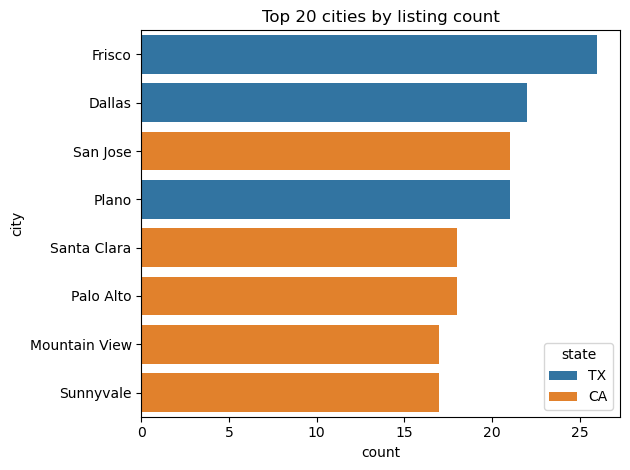

In [40]:
# counts by city (bar)
top_cities = org_data['city'].value_counts().nlargest(20).index
sns.countplot(data=org_data[org_data['city'].isin(top_cities)], y='city', hue='state', order=top_cities)
plt.title('Top 20 cities by listing count')
plt.tight_layout()

## Insights from the list count per city distribution
-> Number of listings among all cities are highest for the City "Frisco"
-> Number of listings among all cities are lowest for the City "Sunnyvale"
-> Among the 2 states, the TX listings are more than CA



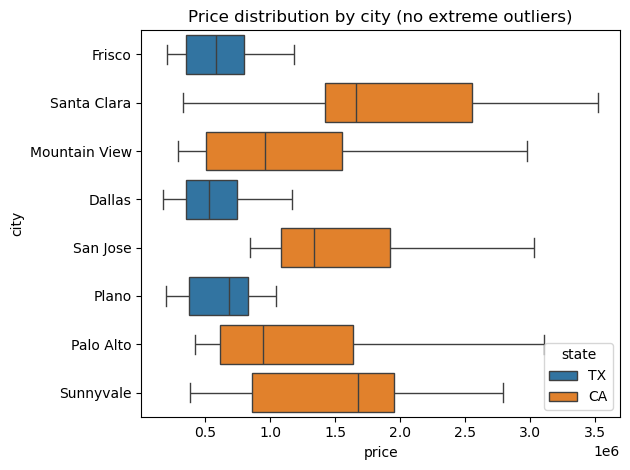

In [41]:
# python
# price distribution by city (box) — limit to top cities to keep plot readable
sns.boxplot(data=org_data[org_data['city'].isin(top_cities)], x='price', y='city', hue='state', showfliers=False)
# plt.xscale('log')  # optional if price is skewed
plt.title('Price distribution by city (no extreme outliers)')
plt.tight_layout()

## Insights from the Price distribution by City
-> CA cities (Sunnyvale, Palo Alto, Mountain View, San Jose, Santa Clara) have noticeably higher median prices than the TX cities shown (Frisco, Dallas, Plano)
-> TX state cities - Frisco, Dallas, Plano have lower medians and generally tighter spreads - implies more consistent, lower‑priced markets
-> No extremem outliers

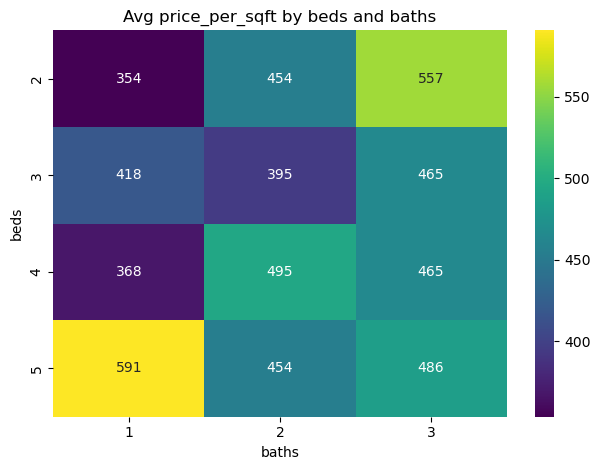

In [43]:
# python
# pivot: avg price_per_sqft by beds x baths, then heatmap
pivot = df.pivot_table(index='beds', columns='baths', values='price_per_sqft', aggfunc='mean')
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='viridis')
plt.title('Avg price_per_sqft by beds and baths')
plt.tight_layout()

## Insights from Avg price/sqft by beds and baths 
-> Ideally we would expect that if there are more bathrooms and bedrooms, there would be increase in the price. But it is not the case here, there is no co-relation between highest numbers of bedroom and bathrooms costs the highest price / costlier (with 5 BEDS and 1 BATHS -> price= 591 vs
 with 2 BEDS and 3 BATHS -> price= 557)
-> The lowest price per sqft is for the 2 BEDS and 1 BATHS -> price = 354, which makes sense that if number of BEDS and number of BATHS is low then price is also low.

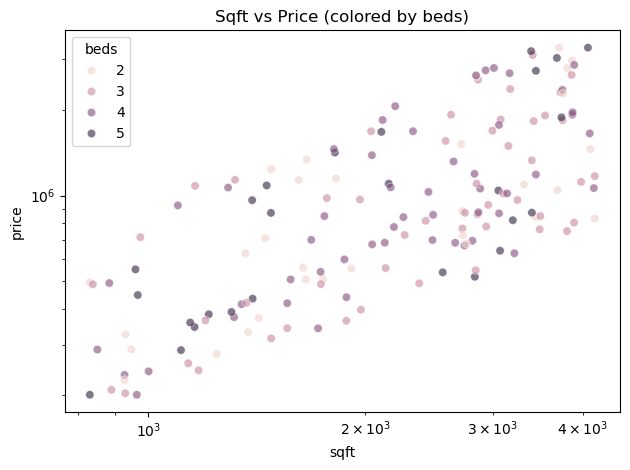

In [32]:
# python
# scatter: sqft vs price colored by beds
sns.scatterplot(data=df.sample(160, random_state=0), x='sqft', y='price', hue='beds', alpha=0.6)
plt.xscale('log'); plt.yscale('log')  # optional
plt.title('Sqft vs Price (colored by beds)')
plt.tight_layout()

## Insights from the sqft vs price colored by beds

-> We can see that prices gets increased with the increase in sqft
-> There is no co-relation between the Sqft and the number of Beds

In [ ]:
# python
# summary table by state
summary = org_data.groupby('state').agg(
    listings=('price','size'),
    mean_price=('price','mean'),
    median_price=('price','median'),
    avg_beds=('beds','mean')
).sort_values('listings', ascending=False)
print(summary.head(20))

       listings    mean_price  median_price  avg_beds
state                                                
CA           91  1.485956e+06     1316301.0  3.505495
TX           69  5.949951e+05      554351.0  3.391304


## Insights about the data

From the Summary table: 
-> CA has more listings compared to TX.
-> As per mean, TX listings are costlier than the CA
-> But the Median values are lesser than Mean which implies that it is Higly Right Skewed. 
-> So, We would go by Median since its higly right skewed
-> By Median, we can conclude that CA has costlier listings than TA

